<a href="https://colab.research.google.com/github/NaveenOburi/Track-And-Consult-Healthcare-services/blob/master/classification_of_rotten_tomatoes_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

from nltk.tokenize import TweetTokenizer
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

In [355]:
# Import the pandas library to read our dataset
import pandas as pd

# Get the train/test split package from sklearn for preparing our dataset to
# train and test the model with
from sklearn.model_selection import train_test_split

# Import the numpy library to work with and manipulate the data
import numpy as np

## tensorflow 
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
import matplotlib.pyplot as plt

import nltk
import random
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [356]:
# Loading in dataset
data = pd.read_csv('https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv', sep='\t')

data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [357]:
data['Sentiment'].unique()

array([1, 2, 3, 4, 0])

In [358]:
data.describe()


,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [359]:
print("Total number of sentences: " + str(data['SentenceId'][-1:].values))


Total number of sentences: [8544]


In [360]:
data.shape


(156060, 4)

In [0]:
# Get number of unique sentences
numSentences = data['SentenceId'].max()

In [0]:
# extract full sentences only from the dataset
fullSentences = []
curSentence = 0
for i in range(data.shape[0]):
  if data['SentenceId'][i]> curSentence:
    fullSentences.append((data['Phrase'][i], data['Sentiment'][i]))
    curSentence = curSentence +1

In [363]:
len(fullSentences)

8544

In [364]:
# put data into a df
fullSentDf = pd.DataFrame(fullSentences,
                                columns=['Phrase', 'Sentiment'])

print(fullSentDf)

                                                 Phrase  Sentiment
0     A series of escapades demonstrating the adage ...          1
1     This quiet , introspective and entertaining in...          4
2     Even fans of Ismail Merchant 's work , I suspe...          1
3     A positively thrilling combination of ethnogra...          3
4     Aggressive self-glorification and a manipulati...          1
...                                                 ...        ...
8539  ... either you 're willing to go with this cla...          2
8540  Despite these annoyances , the capable Claybur...          2
8541  -LRB- Tries -RRB- to parody a genre that 's al...          1
8542  The movie 's downfall is to substitute plot fo...          1
8543  The film is darkly atmospheric , with Herrmann...          2

[8544 rows x 2 columns]


In [365]:
# Check class imbalance in tokenized sentences
data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [366]:
# Check class imbalance in full sentences
fullSentDf['Sentiment'].value_counts()

3    2325
1    2203
2    1659
4    1282
0    1075
Name: Sentiment, dtype: int64

In [0]:
documents = []
#convert data into format for the previous labs

#use full dataset
#for i in range(data.shape[0]):
#  tmpWords = word_tokenize(data['Phrase'][i])
#  documents.append((tmpWords, data['Sentiment'][i]))

# Use only complete sentences
for i in range(fullSentDf.shape[0]):
  tmpWords = word_tokenize(fullSentDf['Phrase'][i])
  documents.append((tmpWords, fullSentDf['Sentiment'][i]))

In [368]:
random.seed(9001)
random.shuffle(documents)
print(documents[1][0])

['For', 'its', '100', 'minutes', 'running', 'time', ',', 'you', "'ll", 'wait', 'in', 'vain', 'for', 'a', 'movie', 'to', 'happen', '.']


In [369]:
len(documents)

8544

In [370]:
#def test123:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_en = stopwords.words("english")
punctuations="?:!.,;'\"-()"

#parameters to adjust to see the impact on outcome
remove_stopwords = True
useStemming = True
useLemma = False
removePuncs = True

for l in range(len(documents)):
  label = documents[l][1]
  tmpReview = []
  for w in documents[l][0]:
    newWord = w
    if remove_stopwords and (w in stopwords_en):
      continue
    if removePuncs and (w in punctuations):
      continue
    if useStemming:
      #newWord = porter.stem(newWord)
      newWord = lancaster.stem(newWord)
    if useLemma:
      newWord = wordnet_lemmatizer.lemmatize(newWord)
    tmpReview.append(newWord)
  documents[l] = (' '.join(tmpReview), label)
print(documents[2])

('ian holm conqu frant earthy napoleon', 3)


In [0]:
all_data = pd.DataFrame(documents,
                                columns=['Phrase', 'sentiment'])
# Splits the dataset so 70% is used for training and 30% for testing
X_train, x_test, Y_train, y_test = train_test_split(all_data['Phrase'], all_data['sentiment'], test_size=0.3,random_state=2003)

In [0]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import SnowballStemmer,WordNetLemmatizer
stemmer=SnowballStemmer('english')
lemma=WordNetLemmatizer()
from string import punctuation
import re

In [0]:
def clean_review(review_col):
    review_corpus=[]
    for i in range(0,len(review_col)):
        review=str(review_col[i])
        review=re.sub('[^a-zA-Z]',' ',review)
        
        review=[lemma.lemmatize(w) for w in word_tokenize(str(review).lower())]
        review=' '.join(review)
        review_corpus.append(review)
    return review_corpus

In [374]:
data['clean_review']=clean_review(data.Phrase.values)
data.head()

,PhraseId,SentenceId,Phrase,Sentiment,clean_review
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapade demonstrating the adage t...
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapade demonstrating the adage t...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


In [375]:
X_train = data
X_train.head()

,PhraseId,SentenceId,Phrase,Sentiment,clean_review
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapade demonstrating the adage t...
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapade demonstrating the adage t...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


In [376]:
np.array(train).shape

(0, 2)

In [377]:
#Tokenize the data train and test

#Tokenize the data train and test
tokenizer = TweetTokenizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 2), tokenizer=tokenizer.tokenize)
full_text = list(X_train['clean_review'].values) 
vectorizer.fit(full_text)
df_upsampled_vectorized = vectorizer.transform(X_train['clean_review'])
y = df_upsampled['Sentiment']


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [378]:
np.array(X_train).shape

(156060, 5)

In [379]:
#convert sentiment to categories 
from keras.utils import to_categorical
X = df_upsampled['clean_review']
Y = to_categorical(df_upsampled['Sentiment'].values)
print(Y)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, random_state=2003)

In [381]:
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)

(109242,) (109242, 5)
(46818,) (46818, 5)


In [382]:
data.shape

(156060, 5)

In [383]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 5 columns):
PhraseId        156060 non-null int64
SentenceId      156060 non-null int64
Phrase          156060 non-null object
Sentiment       156060 non-null int64
clean_review    156060 non-null object
dtypes: int64(3), object(2)
memory usage: 6.0+ MB


In [384]:
print(data.iloc[0]['Phrase'],'Sentiment - ',data.iloc[0]['Sentiment'])


A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . Sentiment -  1


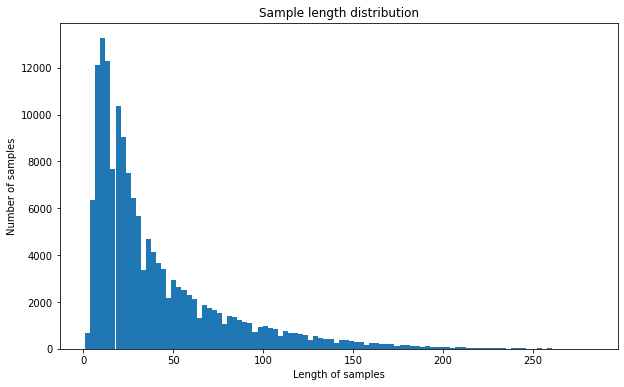

In [385]:
# Now, let's see the average number of words per sample
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(data['Phrase'])], 100)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [386]:
all_words=' '.join(X_train)
all_words=word_tokenize(all_words)
#print(all_words)
dist=FreqDist(all_words)

num_unique_word=len(dist)
num_unique_word
#X_train.head()

13725

In [387]:
r_len=[]
for text in X_train:
    word=word_tokenize(text)
  #  print(text)
    l=len(word)
    r_len.append(l)
    
MAX_REVIEW_LEN=np.max(r_len)
MAX_REVIEW_LEN

48

In [388]:
#Setting features
max_features = num_unique_word
max_words = MAX_REVIEW_LEN
batch_size = 128
epochs =5
num_classes=5
MAX_REVIEW_LEN

48

In [0]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [390]:
X_train

13718                                             their age
91191                                         gorgeous epic
97160                           fan of the gross out comedy
143983    the filmmaker ascends literally to the olympus...
37501                                      twisting mystery
                                ...                        
66444     dulled your sens faster and deeper than any re...
32466                                  bitter and le mature
61551     that play better only for the film s publicist...
84485                                             faith and
7495                                                 extent
Name: clean_review, Length: 109242, dtype: object

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

X_test = tokenizer.texts_to_sequences(train)
#X_test

In [392]:

from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
#print(X_train.shape,X_val.shape)
X_test

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 4257],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 1440]], dtype=int32)

In [0]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import matplotlib.pyplot as plt

In [0]:
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential


In [0]:
model= Sequential()

# Input / Embdedding
model.add(Embedding(max_features, 150, input_length=max_words))


# CNN
model.add(SpatialDropout1D(0.2))

model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

# Output layer
model.add(Dense(5, activation='softmax'))

In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [397]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=5, batch_size=batch_size, verbose=1)

109242/109242 [==============================] - 65s 594us/step - loss: 0.3477 - acc: 0.8574 - f1_m: 0.8569 - precision_m: 0.8683 - recall_m: 0.8459 - val_loss: 1.3350 - val_acc: 0.6369 - val_f1_m: 0.6349 - val_precision_m: 0.6450 - val_recall_m: 0.6251
Epoch 2/5
109242/109242 [==============================] - 64s 582us/step - loss: 0.3263 - acc: 0.8659 - f1_m: 0.8653 - precision_m: 0.8760 - recall_m: 0.8550 - val_loss: 1.3829 - val_acc: 0.6352 - val_f1_m: 0.6326 - val_precision_m: 0.6423 - val_recall_m: 0.6233
Epoch 3/5
109242/109242 [==============================] - 63s 579us/step - loss: 0.3157 - acc: 0.8689 - f1_m: 0.8685 - precision_m: 0.8785 - recall_m: 0.8588 - val_loss: 1.4051 - val_acc: 0.6262 - val_f1_m: 0.6232 - val_precision_m: 0.6337 - val_recall_m: 0.6132
Epoch 4/5
109242/109242 [==============================] - 63s 581us/step - loss: 0.3031 - acc: 0.8743 - f1_m: 0.8739 - precision_m: 0.8833 - recall_m: 0.8648 - val_loss: 1.4690 - val_acc: 0.6329 - val_f1_m: 0.6304 - v

Train on 109242 samples, validate on 46818 samples
Epoch 1/5
109242/109242 [==============================] - 57s 521us/step - loss: 1.0182 - acc: 0.5921 - f1_m: 0.5437 - precision_m: 0.6603 - recall_m: 0.4687 - val_loss: 0.8666 - val_acc: 0.6430 - val_f1_m: 0.6182 - val_precision_m: 0.6833 - val_recall_m: 0.5649
Epoch 2/5
109242/109242 [==============================] - 55s 507us/step - loss: 0.7814 - acc: 0.6821 - f1_m: 0.6648 - precision_m: 0.7179 - recall_m: 0.6196 - val_loss: 0.8260 - val_acc: 0.6586 - val_f1_m: 0.6364 - val_precision_m: 0.6952 - val_recall_m: 0.5872
Epoch 3/5
109242/109242 [==============================] - 55s 505us/step - loss: 0.6904 - acc: 0.7169 - f1_m: 0.7069 - precision_m: 0.7456 - recall_m: 0.6723 - val_loss: 0.8284 - val_acc: 0.6631 - val_f1_m: 0.6458 - val_precision_m: 0.6923 - val_recall_m: 0.6055
Epoch 4/5
109242/109242 [==============================] - 55s 505us/step - loss: 0.6218 - acc: 0.7419 - f1_m: 0.7352 - precision_m: 0.7677 - recall_m: 0.705

In [398]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_val, Y_val, batch_size=128)
print('Accuracy:', accuracy)
print('Test loss:', loss)
print('F1_score:', f1_score)
print('precision:', precision)
print('recall:', recall)

46818/46818 [==============================] - 3s 68us/step
Accuracy: 0.6490025204006837
Test loss: 0.8941125484303024
F1_score: 0.636262967071772
precision: 0.6705278371765447
recall: 0.6055576915396513


In [399]:
data['Phrase'].unique()





array(['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'A series of escapades demonstrating the adage that what is good for the goose',
       'A series', ..., 'avuncular chortles', 'avuncular', 'chortles'],
      dtype=object)

In [400]:
data['Sentiment'].unique()


array([1, 2, 3, 4, 0])

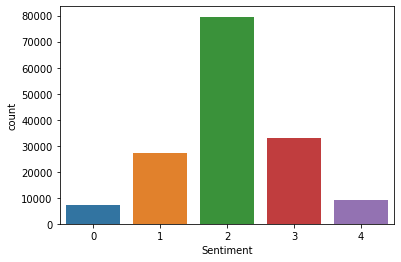

In [401]:
# Distribution of reviews is roughly balanced. 
sns.countplot(data['Sentiment'])
plt.show()

In [402]:
data['text_length'] = data['Phrase'].apply(len)
data[['Sentiment','text_length','Phrase']].head()

,Sentiment,text_length,Phrase
0,1,188,A series of escapades demonstrating the adage ...
1,2,77,A series of escapades demonstrating the adage ...
2,2,8,A series
3,2,1,A
4,2,6,series


In [403]:
data['text_length'].describe()


count    156060.000000
mean         40.217224
std          38.154130
min           1.000000
25%          14.000000
50%          26.000000
75%          53.000000
max         283.000000
Name: text_length, dtype: float64

In [0]:
#g = sns.FacetGrid(data,col='Sentiment')
#g.map(plt.hist,'Phrase')

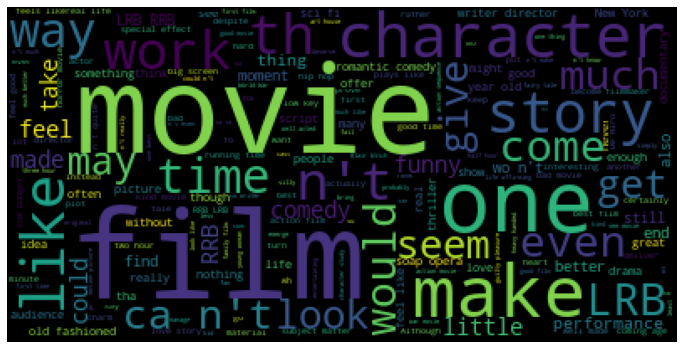

In [405]:
# word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud

text = data['Phrase'].to_string()
wordcloud = WordCloud(
        relative_scaling=0.5,
        stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()